## Predicting cell identity with CellTypist

### import packages

In [5]:
import scanpy as sc
import scipy as io
import pandas as pd

In [6]:
import celltypist
from celltypist import models

In [7]:
import matplotlib.pyplot as plt

In [8]:
sc.set_figure_params(dpi=100)

### import data

11,250 cells x 
29,000 genes

In [53]:
adata = sc.read('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/RNA_only.h5ad')

In [54]:
adata

AnnData object with n_obs × n_vars = 37504 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 'scDblFi

In [55]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,doublet_amulet,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,doublet,wsnn_res.2,wsnn_res.0.5
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,4288.0,4089,23298,22654,...,0,11442.0,4753,1.000000,2.365031e-15,3,1,0,10,11
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,13318.0,11560,21771,21165,...,0,11400.0,4435,0.681192,3.188085e-01,4,2,0,8,22


In [56]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC',
       'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads',
       'gex_conf_exonic_reads', 'gex_conf_intronic_reads',
       'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads',
       'gex_conf_exonic_dup_reads', 'gex_exonic_umis',
       'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads',
       'gex_conf_intronic_dup_reads', 'gex_intronic_umis',
       'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count',
       'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq',
       'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads',
       'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments',
       'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile',
       'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted',
       'scDblFinder.cx

### import model

In [57]:
#new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/model_Alsinet.pkl')
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/model_from_BMA.pkl')

In [58]:
new_model

CellTypist model with 64 cell types and 6071 features
    date: 2024-04-09 21:20:12.035942
    cell types: CD14 monocyte, CD4 T cell, ..., tip EC
    features: SAMD11, HES4, ..., RGR

### apply the custom model on hESCs dataset

In [59]:
adata.X.min()

0.0

In [60]:
adata.X.max()

7687.0

In [61]:
adata.raw = adata

In [62]:
adata.raw.X.min()

0.0

In [63]:
adata.raw.X.max()

7687.0

In [64]:
adata.X.expm1().sum(axis = 1)

matrix([[3.36649891e+072],
        [5.62262575e+067],
        [3.70488033e+151],
        ...,
        [5.07027496e+107],
        [3.59760050e+085],
        [1.04506156e+099]])

## Renormalize to log1p

In [65]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [66]:
sc.pp.log1p(adata)

In [67]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [68]:
celltypist.annotate??

Signature:
celltypist.annotate(
    filename: Union[anndata._core.anndata.AnnData, str] = '',
    model: Union[str, celltypist.models.Model, NoneType] = None,
    transpose_input: bool = False,
    gene_file: Optional[str] = None,
    cell_file: Optional[str] = None,
    mode: str = 'best match',
    p_thres: float = 0.5,
    majority_voting: bool = False,
    over_clustering: Union[str, list, tuple, numpy.ndarray, pandas.core.series.Series, pandas.core.indexes.base.Index, NoneType] = None,
    use_GPU: bool = False,
    min_prop: float = 0,
) -> celltypist.classifier.AnnotationResult
Source:   
def annotate(filename: Union[AnnData,str] = "",
             model: Optional[Union[str, Model]] = None,
             transpose_input: bool = False,
             gene_file: Optional[str] = None,
             cell_file: Optional[str] = None,
             mode: str = 'best match',
             p_thres: float = 0.5,
             majority_voting: bool = False,
             over_clustering: Optional[

In [69]:
#predictions = celltypist.annotate(adata, model = '/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/model_Alsinet.pkl')
predictions = celltypist.annotate(adata, model = '/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/model_from_BMA.pkl')

🔬 Input data has 37504 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 5671 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [70]:
adata = predictions.to_adata()

In [71]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,SCT.weight,ATAC.weight,wsnn_res.0.2,seurat_clusters,doublet,wsnn_res.2,wsnn_res.0.5,n_counts,predicted_labels,conf_score
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,4288.0,4089,23298,22654,...,1.000000,2.365031e-15,3,1,0,10,11,11643.0,DC3,1.0
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,13318.0,11560,21771,21165,...,0.681192,3.188085e-01,4,2,0,8,22,10909.0,DC3,1.0


### visualize celltypist predictions

In [72]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
MK                         8499
myelocyte                  5686
DC3                        4094
schwann cells              2494
MEP                        2445
late erythroid             2245
early MK                   2055
pre pro B progenitor       1885
early erythroid            1839
sinusoidal EC              1076
eosinophil                  741
GMP                         715
monocytoid macrophage       559
tip EC                      468
osteoblast precursor        410
ELP                         401
neutrophil                  333
pro B progenitor            251
CD14 monocyte               180
mid erythroid               153
MOP                         125
osteochondral precursor     113
mast cell                   111
DC2                          99
promonocyte                  92
pre B progenitor             81
DC precursor                 54
naive B cell                 51
promyelocyte                 42
osteoclast                   38
pDC                    

In [73]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
MK                          True
myelocyte                   True
DC3                         True
schwann cells               True
MEP                         True
late erythroid              True
early MK                    True
pre pro B progenitor        True
early erythroid             True
sinusoidal EC               True
eosinophil                  True
GMP                         True
monocytoid macrophage       True
tip EC                      True
osteoblast precursor        True
ELP                         True
neutrophil                  True
pro B progenitor            True
CD14 monocyte               True
mid erythroid               True
MOP                         True
osteochondral precursor     True
mast cell                   True
DC2                         True
promonocyte                 True
pre B progenitor            True
DC precursor                True
naive B cell                True
promyelocyte               False
osteoclast                

In [74]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
MK                          True
myelocyte                   True
DC3                         True
schwann cells               True
MEP                         True
late erythroid              True
early MK                    True
pre pro B progenitor        True
early erythroid             True
sinusoidal EC               True
eosinophil                  True
GMP                         True
monocytoid macrophage       True
tip EC                      True
osteoblast precursor        True
ELP                         True
neutrophil                  True
pro B progenitor            True
CD14 monocyte               True
mid erythroid               True
MOP                         True
osteochondral precursor     True
mast cell                   True
DC2                        False
promonocyte                False
pre B progenitor           False
DC precursor               False
naive B cell               False
promyelocyte               False
osteoclast                

In [75]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 37255 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [76]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

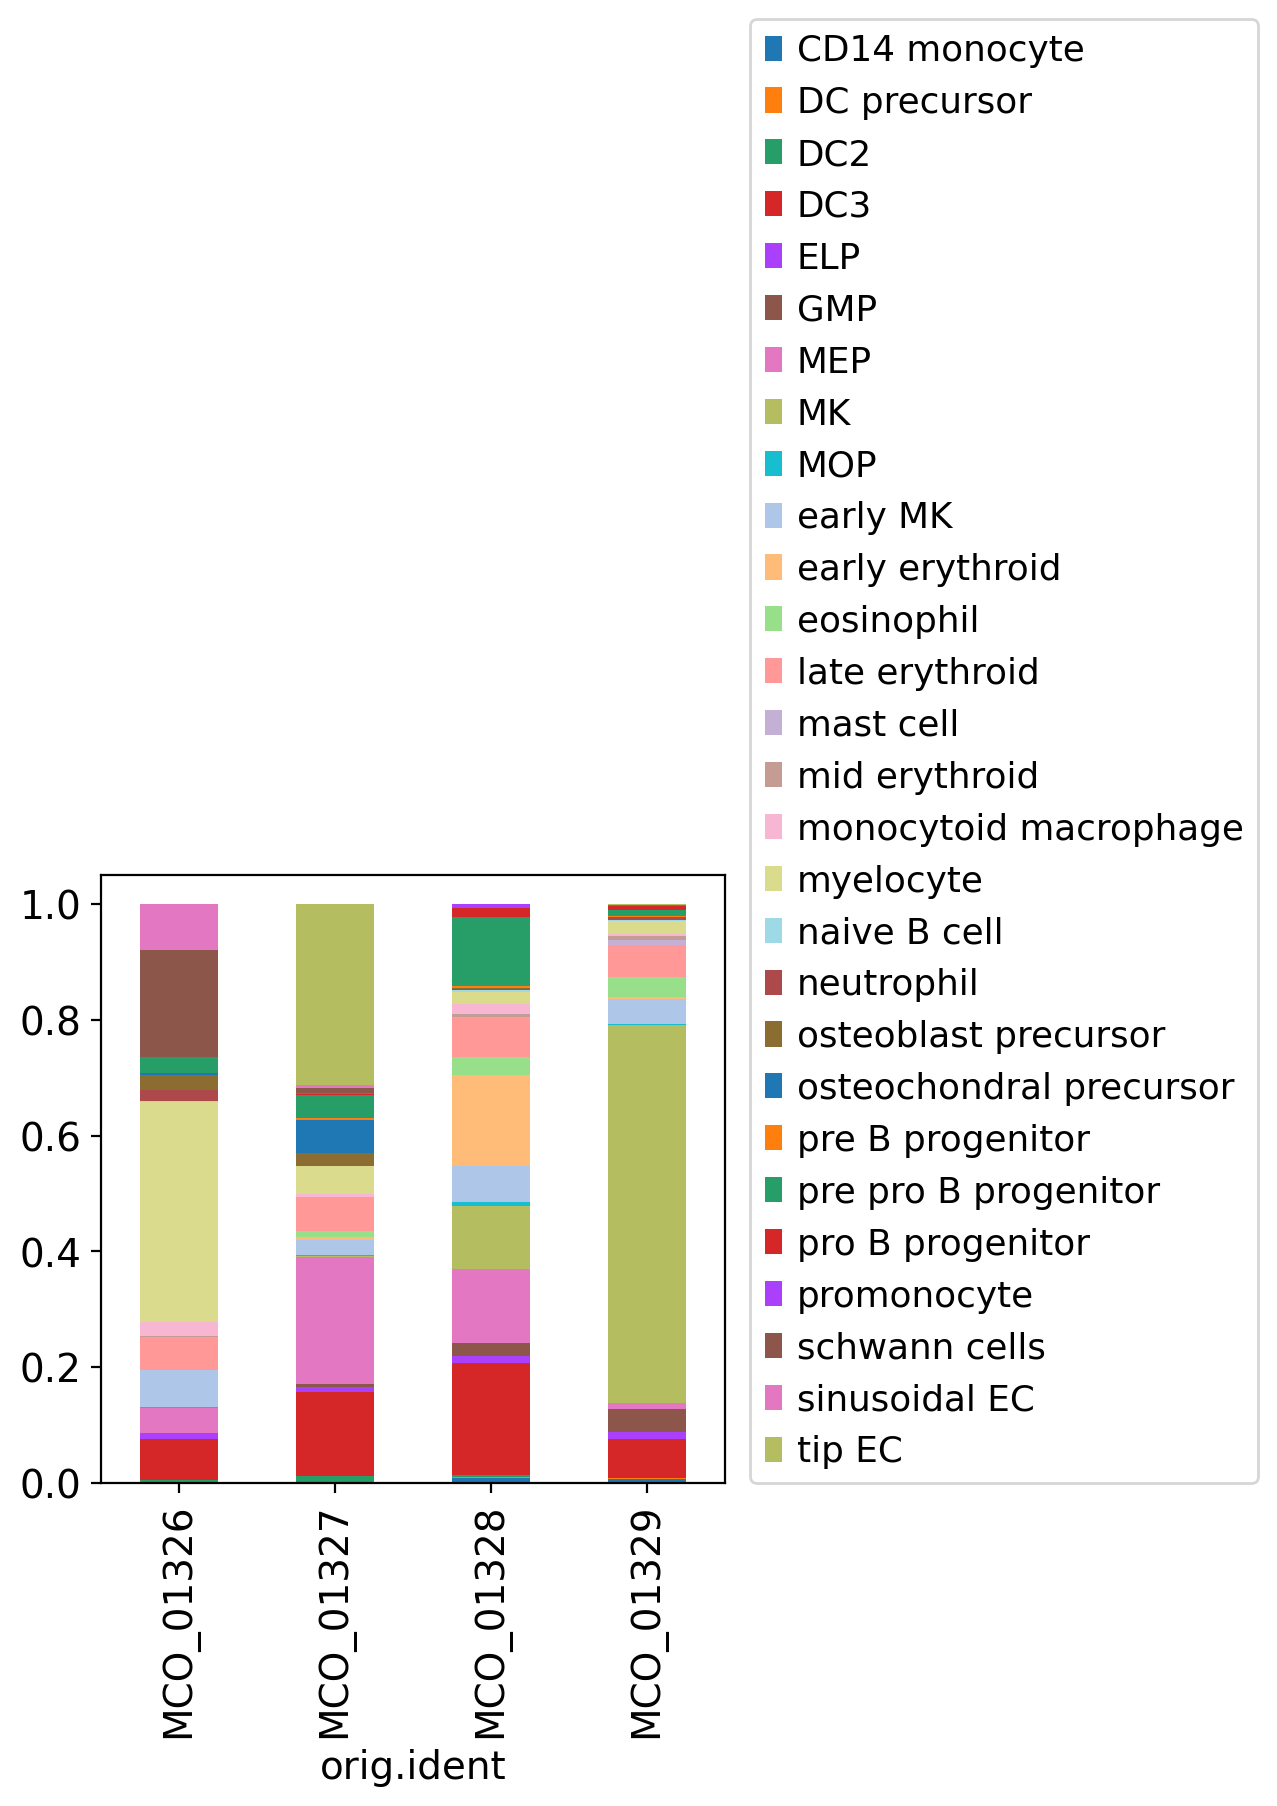

In [77]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [78]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [79]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [80]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [81]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [82]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

### checking confidence score

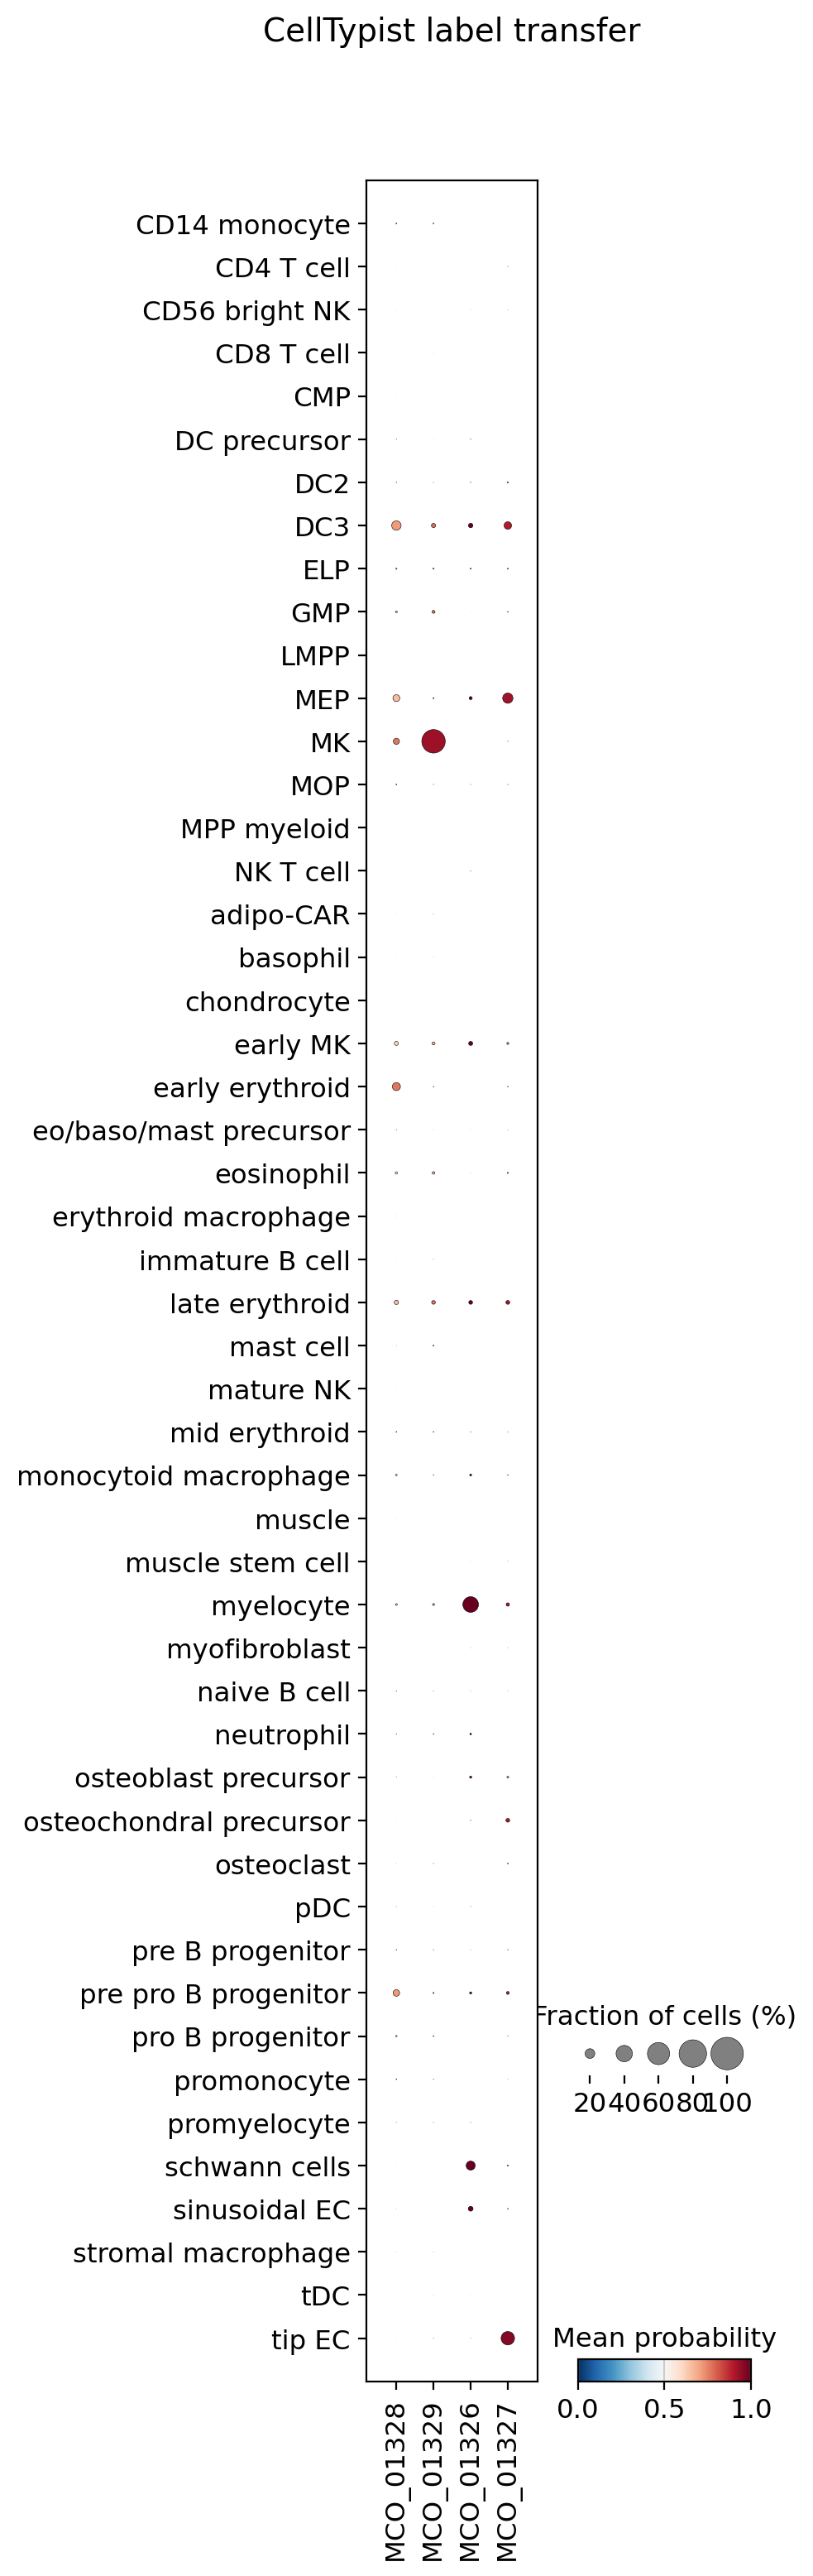

In [83]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels')

### save results

In [84]:
#adata.write('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/Alsinet_celltypist_prediction.h5ad')
adata.write('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/Hannifa_celltypist_prediction.h5ad')

... storing 'orig.ident' as categorical
... storing 'scDblFinder.class' as categorical
... storing 'scDblFinder.class_atac' as categorical
... storing 'DBL_comb' as categorical
... storing 'wsnn_res.0.2' as categorical


In [85]:
#adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/Alsinet_celltypist_prediction.csv')
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/Hannifa_celltypist_prediction.csv')